## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Details
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

1. **Pregnancies** Number of times pregnant
2. **Glucose** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. **BloodPressure** Diastolic blood pressure (mm Hg)
4. **SkinThickness** Triceps skin fold thickness (mm)
5. **Insulin** 2-Hour serum insulin (mu U/ml)
6. **BMI** Body mass index (weight in kg/(height in m)^2)
7. **DiabetesPedigreeFunction** Diabetes pedigree function
8. **Age** Age (years)
9. **Outcome** Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [144]:
df = pd.read_csv('diabetes (1).csv')

#### Displaying the Head of dataframe

In [216]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1


#### Exploring dataset for non null and extreme values

In [163]:
# Few of the blood pressure value is 0, which is not possible. Hence filling the values with mean
val = df[df['BloodPressure'] != 0]['BloodPressure'].mean()
df['BloodPressure'] = df['BloodPressure'].apply(lambda x: val if(x == 0) else x)
df.head()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.000000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.500000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null float64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


#### Possible Outcomes values

In [165]:
df['Outcome'].unique()

array([1, 0])

#### Bivariate Analysis

In [166]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.208522,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.217728,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.208522,0.217728,1.000000,0.006114,-0.046829,0.233123,-0.002763,0.324595,0.166074
SkinThickness,-0.081672,0.057328,0.006114,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,-0.046829,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.233123,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,-0.002763,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.324595,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.166074,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


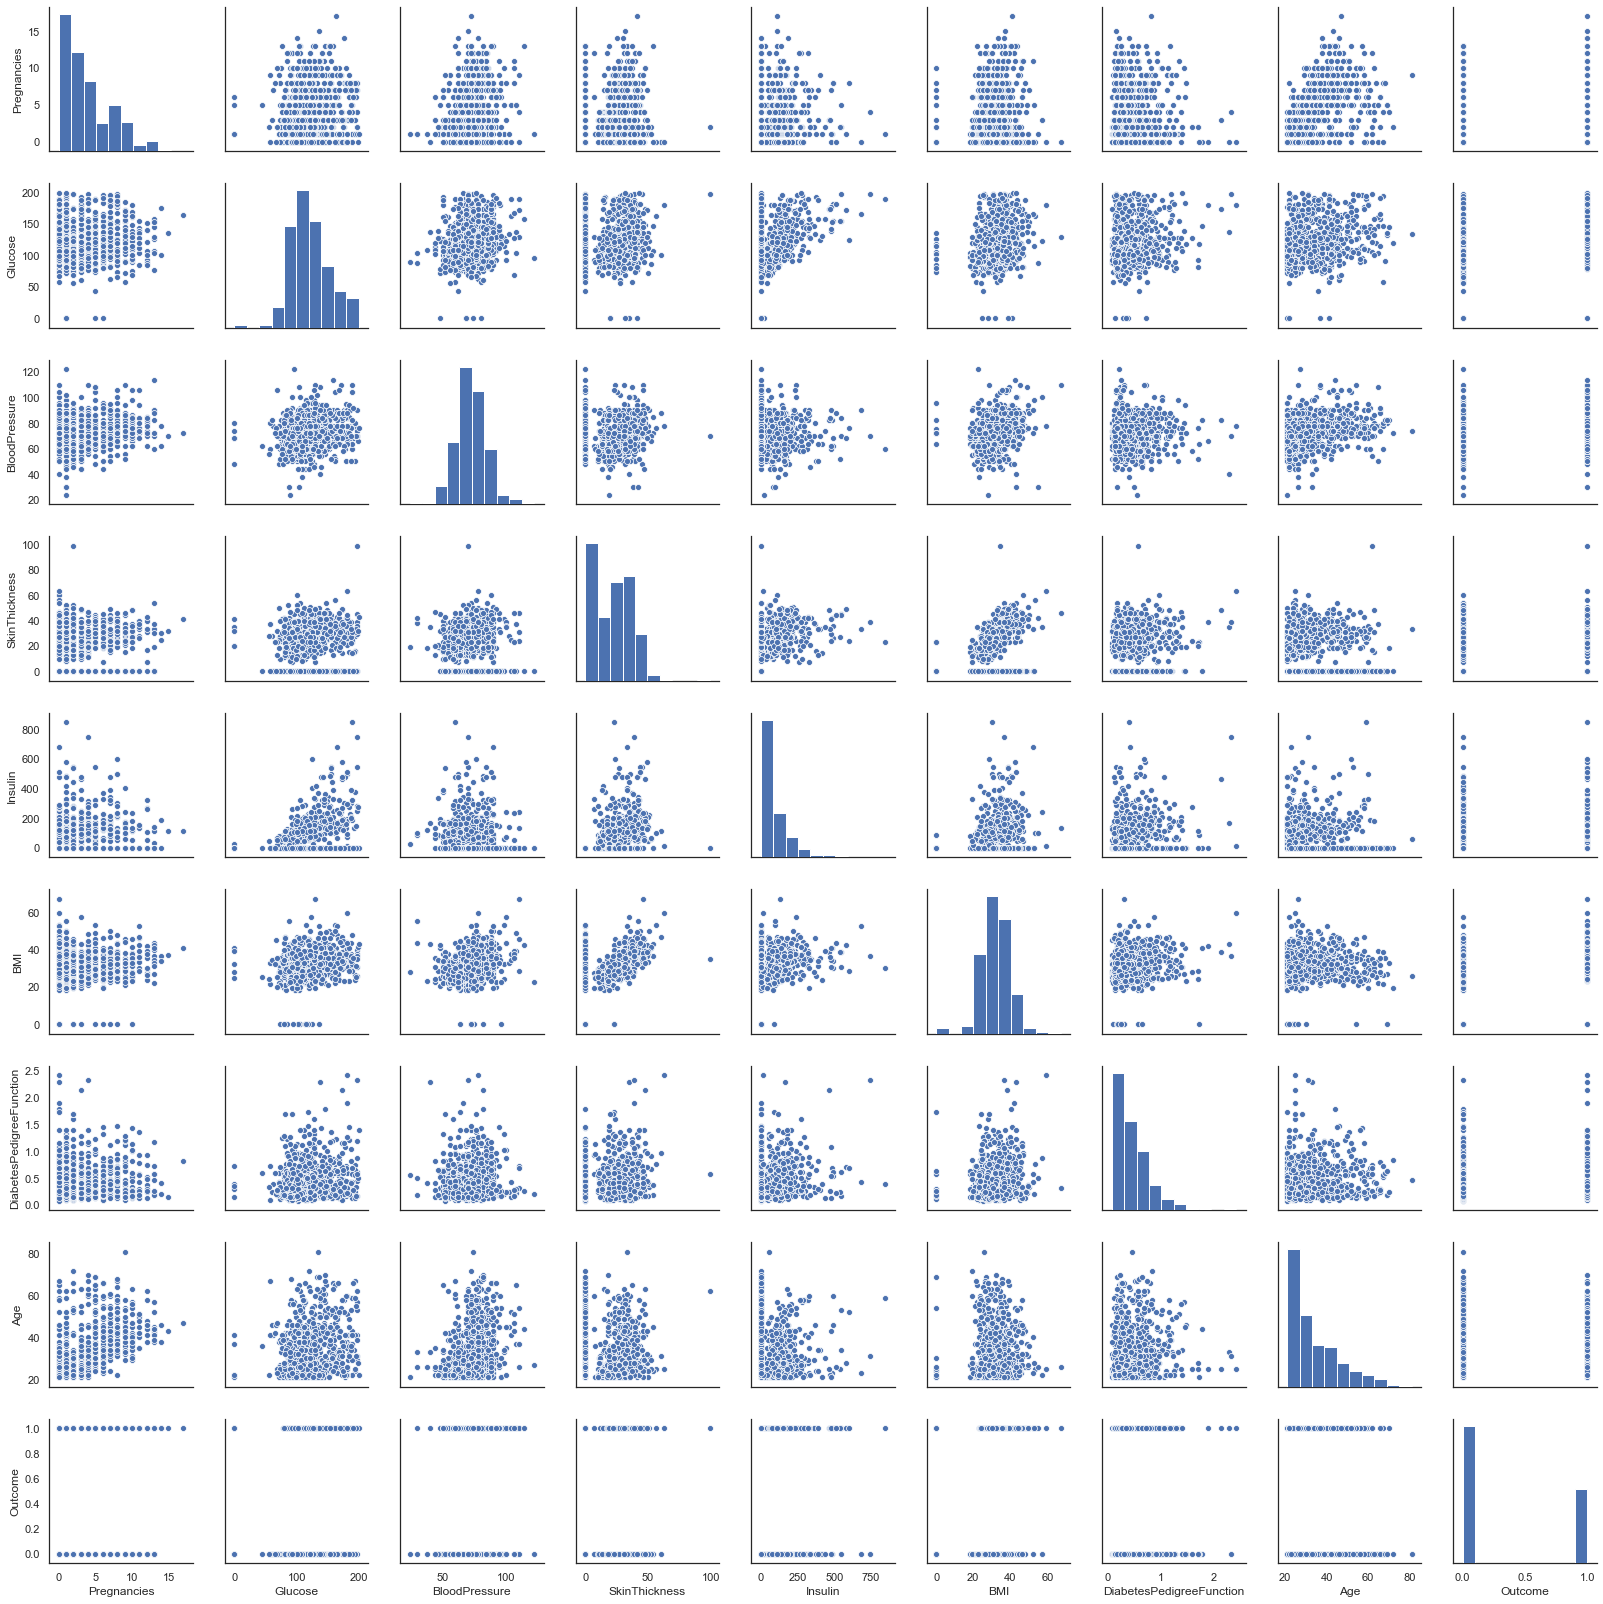

In [158]:
sns.pairplot(data=df)

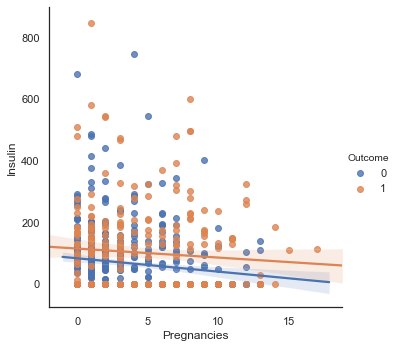

In [170]:
sns.lmplot(data=df, x='Pregnancies',y='Insulin', hue='Outcome')
# We can see that as number of Pregnancies increase, insulin decreases and the number of 
# diabetic patients increase

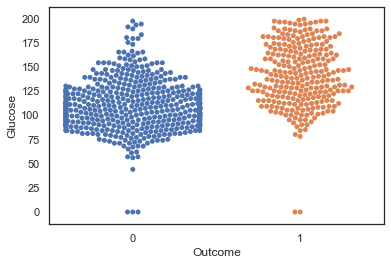

In [179]:
sns.swarmplot(x='Outcome', y='Glucose',data=df)
# Increase in the glucose level above normal (i.e. 140) is suspected to have diabetes

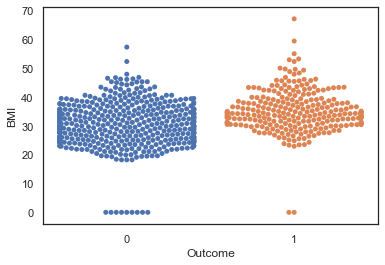

In [139]:
sns.swarmplot(data=df, x='Outcome', y='BMI')

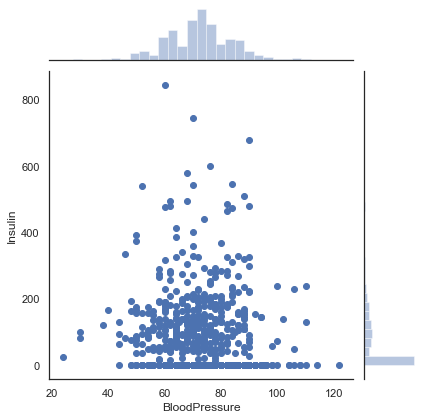

In [186]:
sns.jointplot(x='BloodPressure', y='Insulin', data=df)
# Increase in blood pressure decreases the Insulin level
# We can see it more clearly in the regression plot

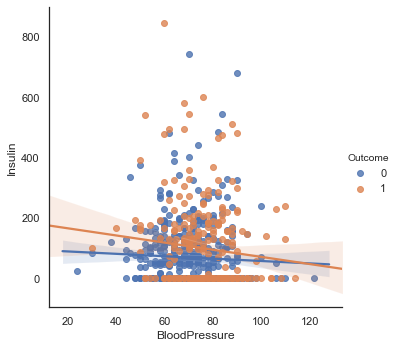

In [188]:
sns.lmplot(x='BloodPressure', y='Insulin',data=df, hue='Outcome')

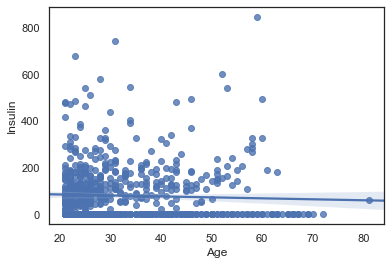

In [193]:
# Insulin decreases with increase in Age
sns.regplot(x='Age', y = 'Insulin', data=df)

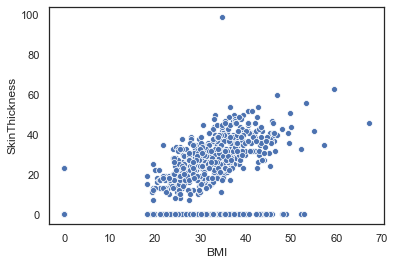

In [222]:
# As BMI increases, skin thickness also increases
sns.scatterplot(x='BMI', y='SkinThickness', data=df)

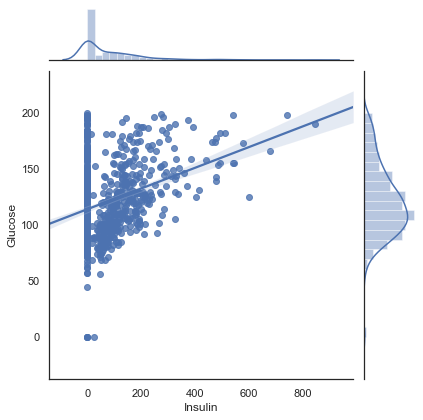

In [196]:
sns.jointplot(x='Insulin',y='Glucose', data=df, kind='reg')
# Initially as insulin increases, Glucose decreases
# But as insulin content increases, body get adjusted to high dose of insulin, in order tp remove
# glucose from the blood.
# Because of this high requirement of insulin, we can see the increase in the glucose as
# insulin increases

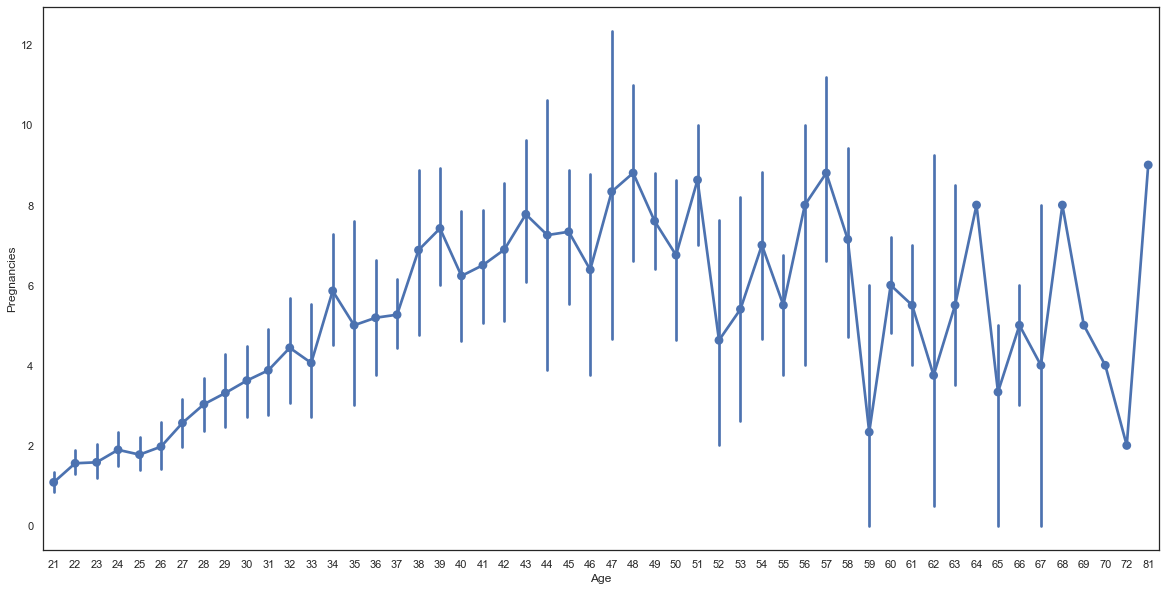

In [214]:
plt.figure(figsize=(20, 10))
sns.pointplot(x='Age',y='Pregnancies', data=df, kind='hex',size_order=[30,50])
# As age increases, the pregnencies count increase

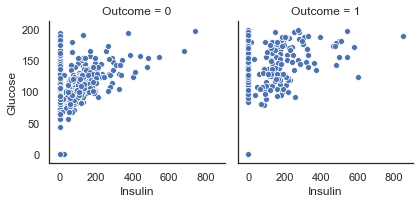

In [221]:
g = sns.FacetGrid(data=df, col='Outcome')
g.map(sns.scatterplot, 'Insulin','Glucose')

In [ ]:
g = sns.FacetGrid(data=df, col='Outcome')
g.map(sns.distplot)

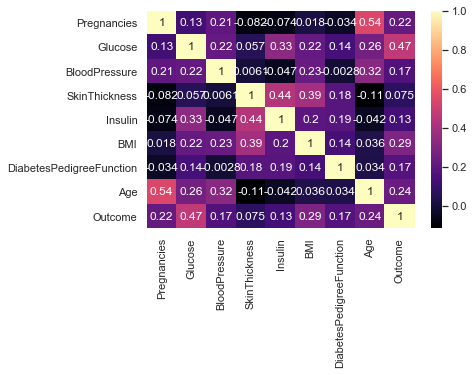

In [218]:
sns.heatmap(corr, annot=True, cmap='magma')

## Observations
There are two main factors that affect the diabetes. All the other factors directly or indirectly affects these two vary which causes the diabetes in a patient.
* **Insulin Levels** A very high rise in the insulin level causes the person to have diabetes.
* **Glucose** A high count in the glucose level is dangerous ( more than 140 ) and might indicate diabetes

<br>
From the observations we can notice that most of the attributes relate mainly to Insulin Levels, Glucose, BloodPressure
<br>

##### Example
1. **Age** Increase in the age leads to increase in the pregnancies, which inturn causes the decrease in the insulin level, which may cause diabetes. Or, as age increases, the blood pressure increases which again might indicate that patient might suffer from diabetes.
2. **SkinThickness** Increase in the skin thickness leads to increase in the BMI, which causes insulin to increase and might indicate diabetes.
3. **BloodPressurre** Increase in the blood pressure shows the decrease in the insulin level. If the insulin level falls very low, then the glucose count of the body increases and might cause diabetes